In [134]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# C


# F-test

In [265]:
alpha = 0.05  
sample_num = 20
num_samples = 20
num_params = 3
f_critical = stats.f.ppf(1-alpha, num_params-1, num_samples-num_params)
print("F critical value:", f_critical)

F critical value: 3.5915305684750827


Asymptomatic 

In [214]:
data_asymptomatic = pd.read_csv('./Asymptomatic_Subjects.csv')
data_glucose_a = data_asymptomatic[['gIn','gOut','iOut']]
data_isulin_a = data_asymptomatic[['iIn','gOut','iOut']]

In [215]:
model_glucose_a = ols('gIn ~ 1+gOut+gOut*iOut', data=data_glucose_a).fit()
print(model_glucose_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     3.995
Date:                Tue, 05 Nov 2024   Prob (F-statistic):             0.0267
Time:                        16:55:26   Log-Likelihood:                -149.33
No. Observations:                  20   AIC:                             306.7
Df Residuals:                      16   BIC:                             310.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.293e+04   2.11e+04      0.612      0.5

Plot our fitted model and data point

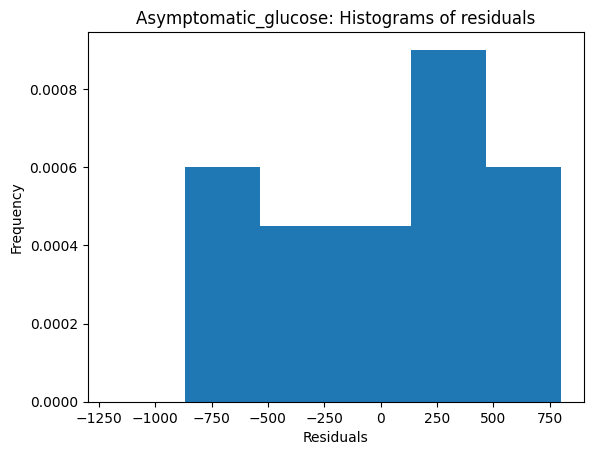

Text(0.5, 1.0, 'Asymptomatic_glucose: Normal Probability Plot')

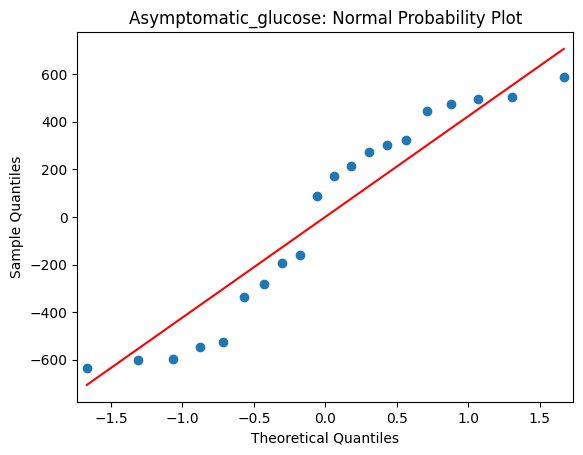

In [269]:
plt.hist(model_glucose_a.resid,bins=6,range=[-1200,800],density=True)
plt.title('Asymptomatic_glucose: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_glucose_a.resid)
pplot1.qqplot(line='s')
plt.title('Asymptomatic_glucose: Normal Probability Plot')

In [219]:
model_isulin_a = ols('iIn ~ 1+iOut+gOut', data=data_isulin_a).fit()
print(model_isulin_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     4.136
Date:                Tue, 05 Nov 2024   Prob (F-statistic):             0.0344
Time:                        16:56:47   Log-Likelihood:                -99.499
No. Observations:                  20   AIC:                             205.0
Df Residuals:                      17   BIC:                             208.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    731.5407    260.817      2.805      0.0

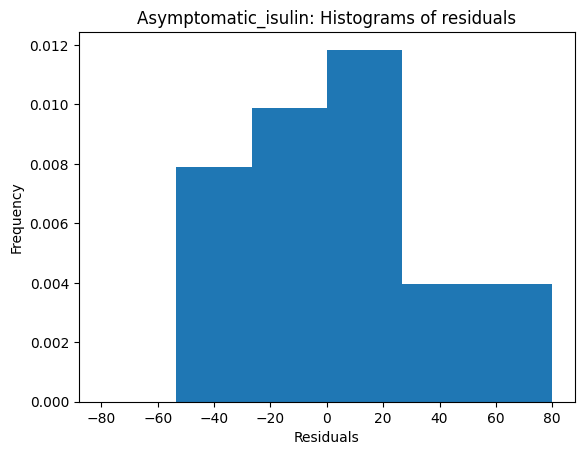

Text(0.5, 1.0, 'Asymptomatic_isulin: Normal Probability Plot')

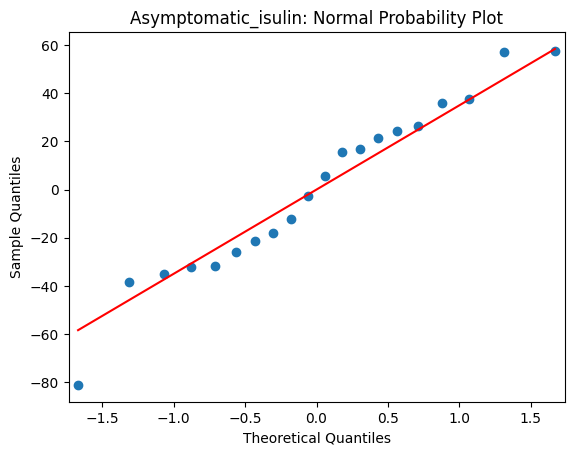

In [270]:
plt.hist(model_isulin_a.resid,bins=6,range=[-80,80],density=True)
plt.title('Asymptomatic_isulin: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_isulin_a.resid)
pplot1.qqplot(line='s')
plt.title('Asymptomatic_isulin: Normal Probability Plot')

Type I

In [221]:
data_I = pd.read_csv('TypeI_Subjects.csv')
data_glucose_I = data_I[['gIn','gOut','iOut']]
data_isulin_I = data_I[['iIn','gOut','iOut']]

In [224]:
model_glucose_I = ols('gIn ~ 1+gOut+gOut*iOut', data=data_glucose_I).fit()
print(model_glucose_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     2.605
Date:                Tue, 05 Nov 2024   Prob (F-statistic):             0.0877
Time:                        16:58:05   Log-Likelihood:                -152.52
No. Observations:                  20   AIC:                             313.0
Df Residuals:                      16   BIC:                             317.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7759.1044   1.14e+04     -0.679      0.5

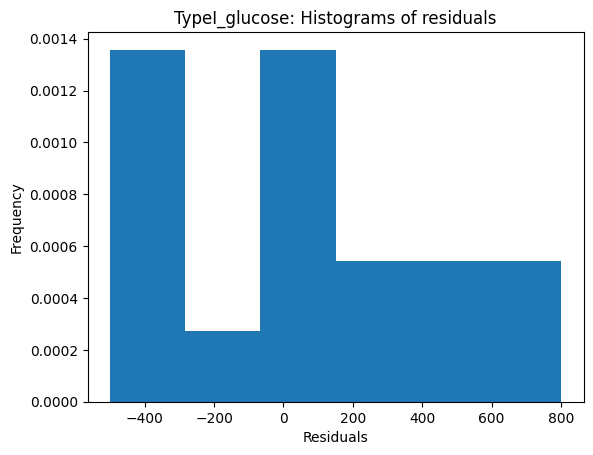

Text(0.5, 1.0, 'TypeI_glucose: Normal Probability Plot')

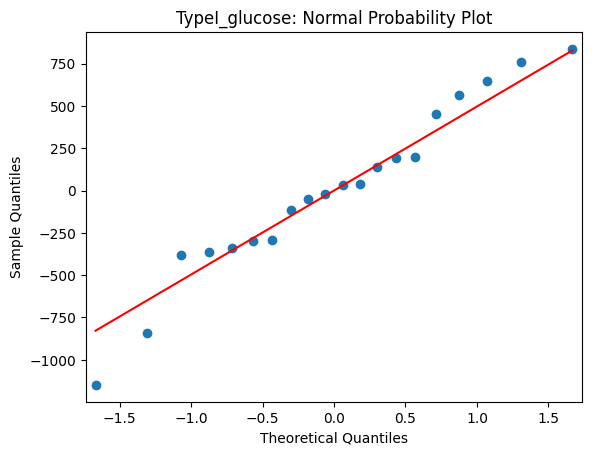

In [271]:
plt.hist(model_glucose_I.resid,bins=6,range=[-500,800],density=True)
plt.title('TypeI_glucose: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_glucose_I.resid)
pplot1.qqplot(line='s')
plt.title('TypeI_glucose: Normal Probability Plot')

In [226]:
model_isulin_I = ols('iIn ~ 1+iOut+gOut', data=data_isulin_I).fit()
print(model_isulin_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     53.70
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           4.49e-08
Time:                        16:58:23   Log-Likelihood:                -93.630
No. Observations:                  20   AIC:                             193.3
Df Residuals:                      17   BIC:                             196.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    937.6001    122.087      7.680      0.0

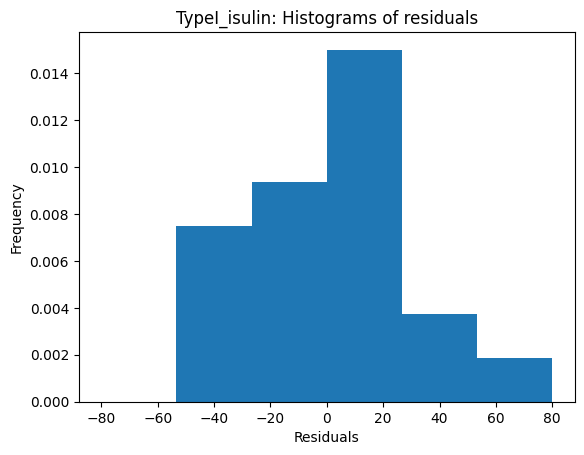

Text(0.5, 1.0, 'TypeI_isulin: Normal Probability Plot')

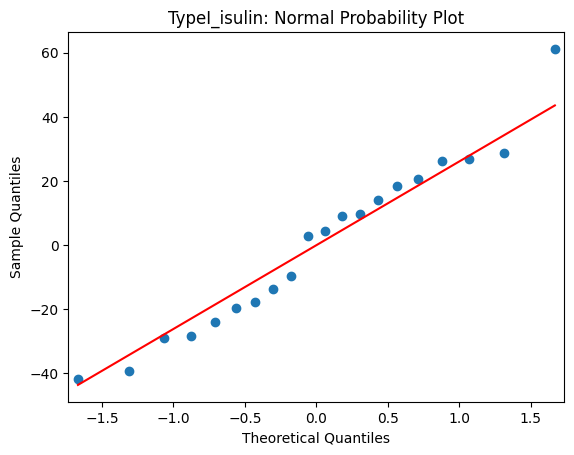

In [275]:
plt.hist(model_isulin_I.resid,bins=6,range=[-80,80],density=True)
plt.title('TypeI_isulin: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_isulin_I.resid)
pplot1.qqplot(line='s')
plt.title('TypeI_isulin: Normal Probability Plot')

Type II

In [229]:
data_II = pd.read_csv('TypeII_Subjects.csv')
data_glucose_II = data_II[['gIn','gOut','iOut']]
data_isulin_II = data_II[['iIn','gOut','iOut']]

In [230]:
model_glucose_II = ols('gIn ~ 1+gOut+gOut*iOut', data=data_glucose_II).fit()
print(model_glucose_II.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     22.03
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           6.32e-06
Time:                        16:59:26   Log-Likelihood:                -137.81
No. Observations:                  20   AIC:                             283.6
Df Residuals:                      16   BIC:                             287.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.202e+05   4.76e+04     -2.524      0.0

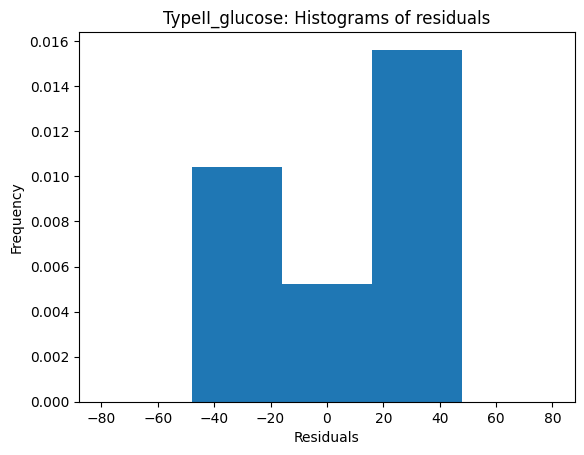

Text(0.5, 1.0, 'TypeII_glucose: Normal Probability Plot')

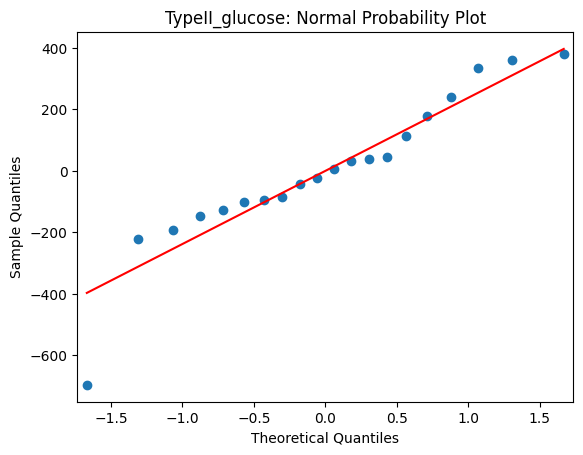

In [276]:
plt.hist(model_glucose_II.resid,bins=5,range=[-80,80],density=True)
plt.title('TypeII_glucose: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_glucose_II.resid)
pplot1.qqplot(line='s')
plt.title('TypeII_glucose: Normal Probability Plot')

In [231]:
model_isulin_II = ols('iIn ~ 1+iOut+gOut', data=data_isulin_II).fit()
print(model_isulin_II.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     9.850
Date:                Tue, 05 Nov 2024   Prob (F-statistic):            0.00144
Time:                        16:59:42   Log-Likelihood:                -102.87
No. Observations:                  20   AIC:                             211.7
Df Residuals:                      17   BIC:                             214.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1024.2849    373.635      2.741      0.0

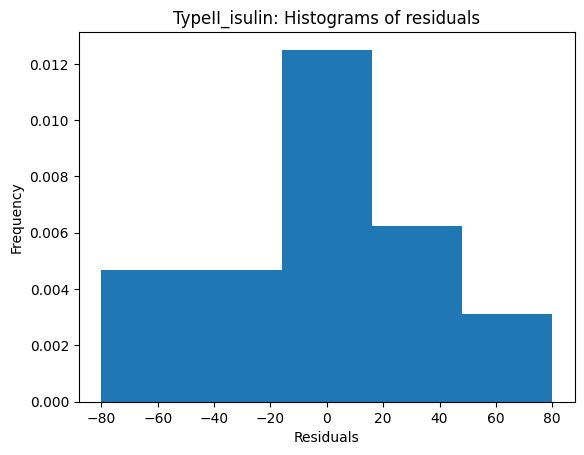

Text(0.5, 1.0, 'TypeII_isulin: Normal Probability Plot')

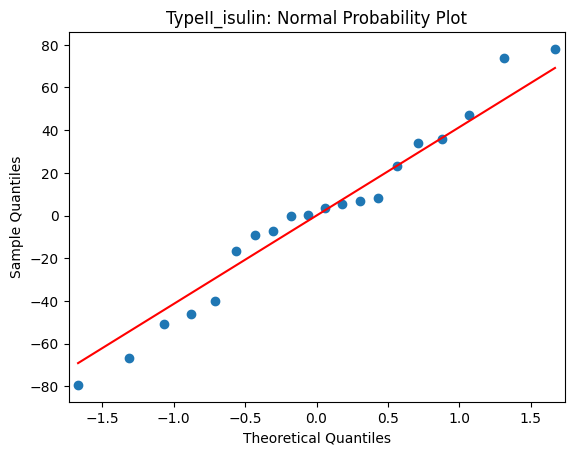

In [278]:
plt.hist(model_isulin_II.resid,bins=5,range=[-80,80],density=True)
plt.title('TypeII_isulin: Histograms of residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

pplot1 = sm.ProbPlot(model_isulin_II.resid)
pplot1.qqplot(line='s')
plt.title('TypeII_isulin: Normal Probability Plot')

# E

In [262]:
glucose_fomula = ['gIn ~ gOut+gOut*iOut','gIn ~ 1+iOut','gIn ~ 1+gOut']
isulin_fomula = ['iIn ~ iOut+gOut','iIn ~ 1+gOut','iIn ~ 1+iOut']

asymptomatic

Glucose

In [263]:
print(f"Full model F value:{model_glucose_a.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________')
    model_glucose_r = ols(fomula, data=data_glucose_a).fit()
    print(fomula)
    print(model_glucose_r.fvalue)

Full model F value:3.995083867849121

Reduce model F value on asymptomatic
________________
gIn ~ gOut+gOut*iOut
3.995083867849121
________________
gIn ~ 1+iOut
1.0603014741693682
________________
gIn ~ 1+gOut
7.626173541526137


Insulin

In [260]:
print(f"Full model F value:{model_isulin_a.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________')
    model_isulin_r = ols(fomula, data=data_isulin_a).fit()
    print(fomula)
    print(model_isulin_r.fvalue)

Full model F value:4.13614660335206

Reduce model F value on asymptomatic
________________
iIn ~ iOut+gOut
4.13614660335206
________________
iIn ~ 1+gOut
7.751733782237714
________________
iIn ~ 1+iOut
0.9860239070284085


Tyep I

Glucose

In [241]:
print(f"Full model F value:{model_glucose_I.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________')
    model_glucose_r = ols(fomula, data=data_glucose_I).fit()
    print(fomula)
    print(model_glucose_r.fvalue)

Full model F value:2.605031685403771

Reduce model F value on asymptomatic
________________
gIn ~ gOut+gOut*iOut
2.605031685403771
________________
gIn ~ 1+iOut
3.141533042369039
________________
gIn ~ 1+gOut+gOut
0.5067779030202186


Isulin

In [258]:
print(f"Full model F value:{model_isulin_I.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________')
    model_isulin_r = ols(fomula, data=data_isulin_I).fit()
    print(fomula)
    print(model_isulin_r.fvalue)

Full model F value:53.70297970855455

Reduce model F value on asymptomatic
________________
iIn ~ iOut+gOut
53.70297970855455
________________
iIn ~ 1+gOut
81.54132339183874
________________
iIn ~ 1+iOut
12.586604999026287


Type II

Glucose

In [256]:
print(f"Full model F value:{model_glucose_II.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in glucose_fomula:
    print('________________')
    model_glucose_r = ols(fomula, data=data_glucose_II).fit()
    print(fomula)
    print(model_glucose_r.fvalue)

Full model F value:22.031329574881934

Reduce model F value on asymptomatic
________________
gIn ~ gOut+gOut*iOut
22.031329574881934
________________
gIn ~ 1+iOut
3.3887475428436806
________________
gIn ~ 1+gOut+gOut
23.78800690270186


Insulin

In [261]:
print(f"Full model F value:{model_isulin_II.fvalue}\n")
print("Reduce model F value on asymptomatic")
for fomula in isulin_fomula:
    print('________________')
    model_isulin_r = ols(fomula, data=data_isulin_II).fit()
    print(fomula)
    print(model_isulin_r.fvalue)

Full model F value:9.849681483996559

Reduce model F value on asymptomatic
________________
iIn ~ iOut+gOut
9.849681483996559
________________
iIn ~ 1+gOut
9.360358682522337
________________
iIn ~ 1+iOut
4.751514767669668
